In [2]:
import os

from matplotlib import pyplot as plt
import numpy as np

from analysis.utils import plot_mat
from lib.dataset.hico_hake import HicoHake
from lib.dataset.utils import Splits

os.chdir('/home/alex/PartHOIZS')

hh = HicoHake()
split = Splits.TRAIN

inters = hh.split_annotations[split]

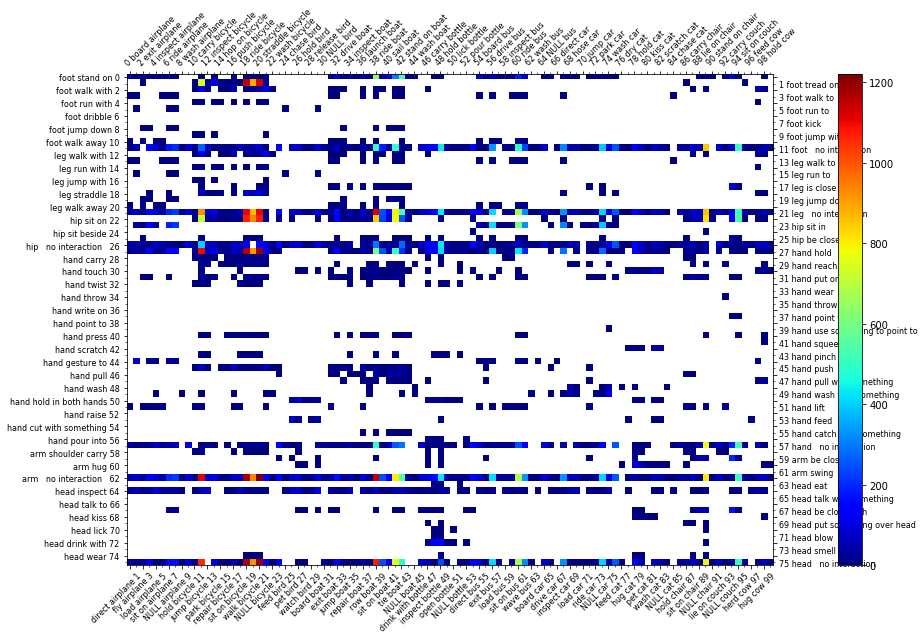

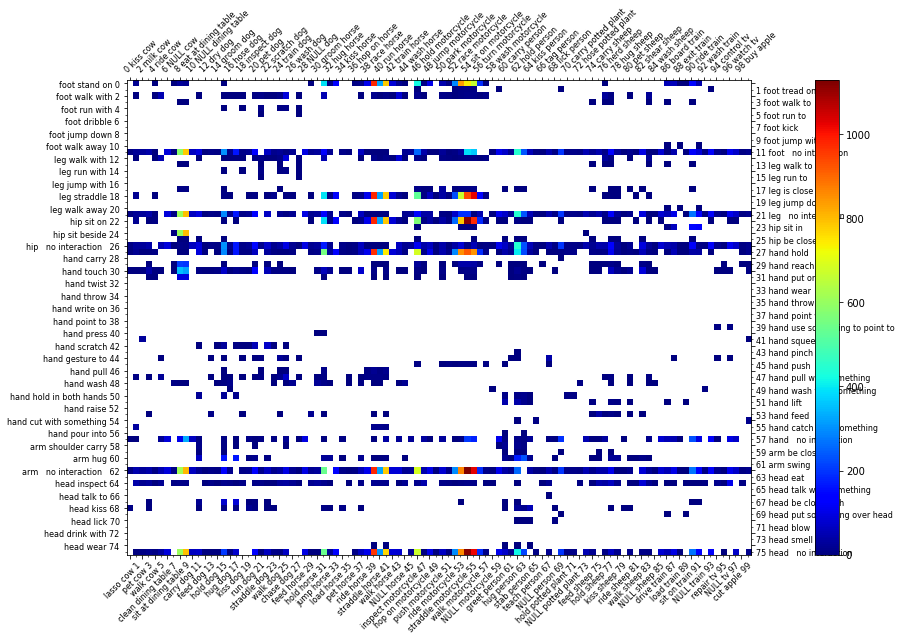

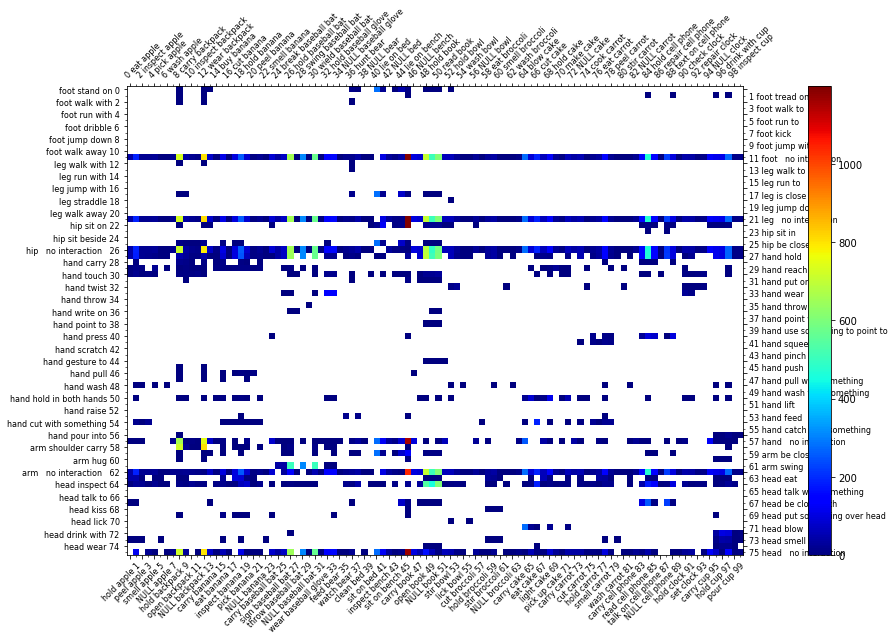

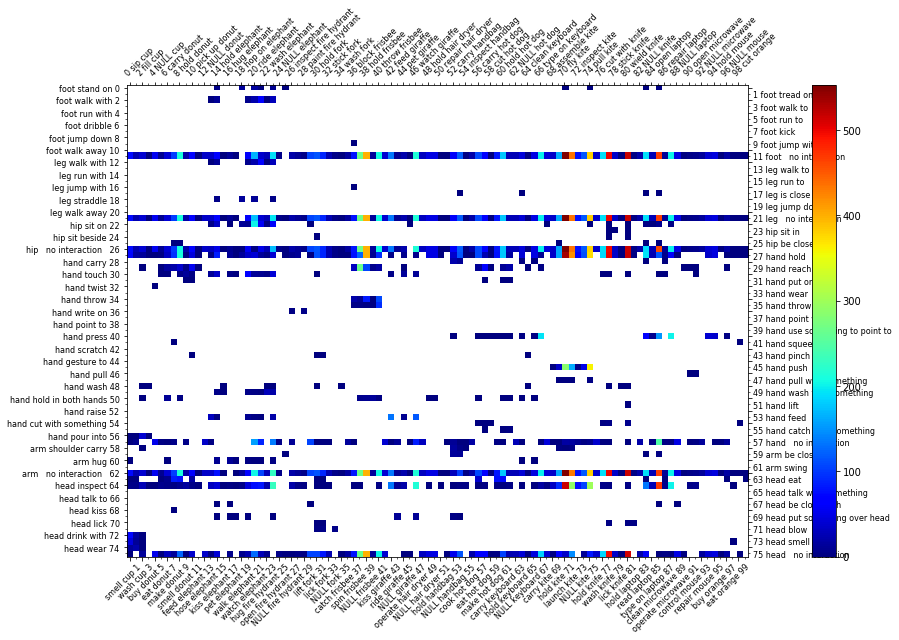

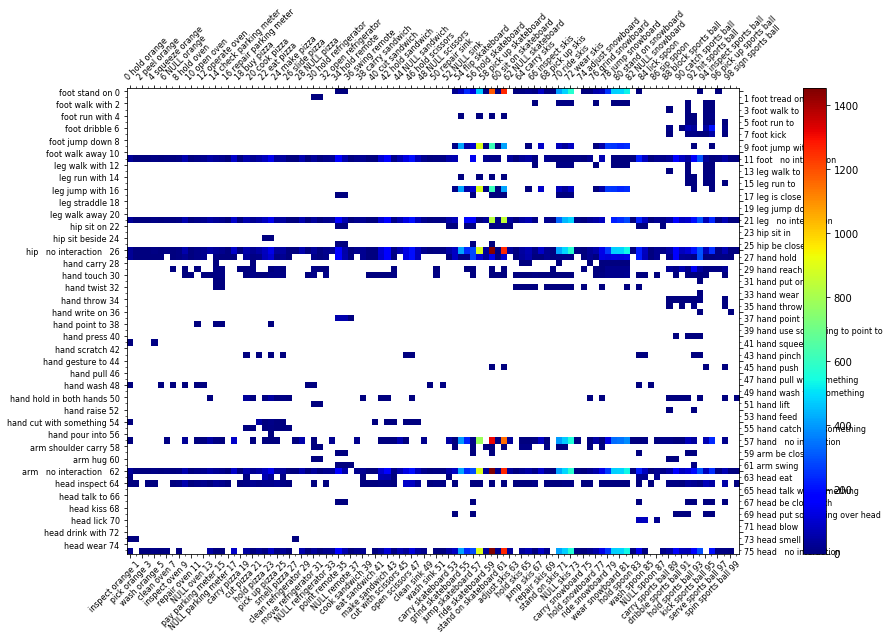

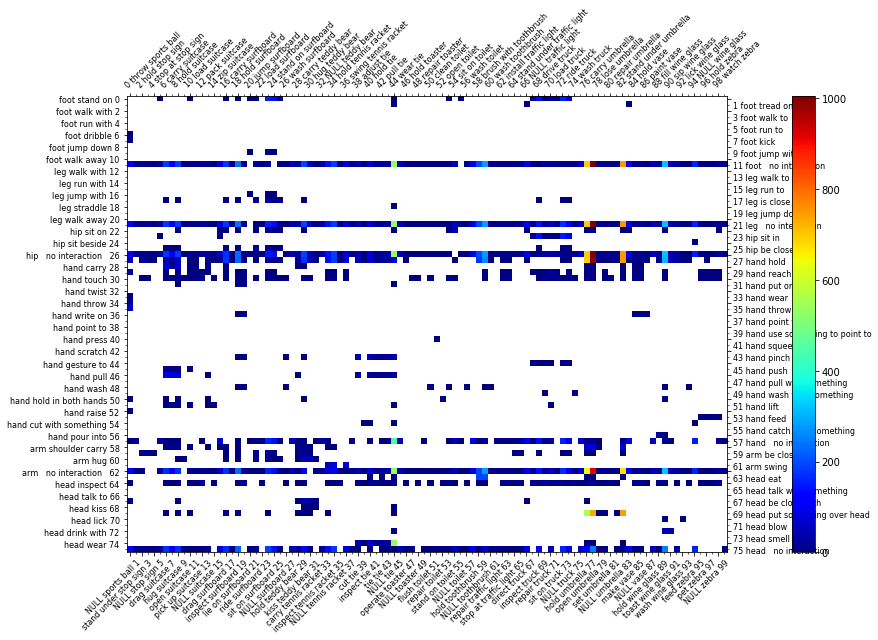

In [15]:
parts = hh.split_part_annotations[split]

part_inters_cooccs = parts.T @ inters

inter_strs = [f'{hh.actions[a] if a > 0 else "NULL"} {hh.objects[o]}' 
              for a, o in hh.interactions]
part_action_strs = [f'{p} {a}'
                    for p, a in hh.part_actions_pairs]

for i in range(6):
    plot_mat(part_inters_cooccs[:, i*100:(i+1)*100], 
             xticklabels=inter_strs[i*100:(i+1)*100], 
             yticklabels=part_action_strs,
             zero_color=[1, 1, 1])
    

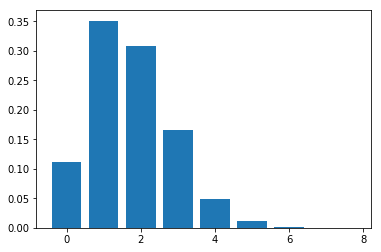

In [11]:
null_interactions = (hh.interactions[:, 0] == 0)
# objs = inters @ hh.interaction_to_object_mat
objs = inters[:, ~null_interactions] @ hh.interaction_to_object_mat[~null_interactions, :]

num_objs_per_img = objs.sum(axis=1)

plt.hist(num_objs_per_img, bins=np.unique(num_objs_per_img), 
         rwidth=0.8, align='left', density=True)
plt.show()